# Код реалізації та результати до завдання 1
Import libraries

In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

from labs.helpers import read_dataset

Prepare to load data

In [2]:
data_dir = "../../data/train"
classes = ["field", "road", "town", "water"]
file_pattern = "*{}*.jpg"
standard_shape = (50, 50, 3)

Load data and split it to train and test datasets

In [3]:
dataset, features = read_dataset(data_dir, classes, file_pattern, standard_shape)
train_df = dataset.sample(frac=0.85, random_state=18)
test_df = dataset.drop(train_df.index)

Demonstrate datasets

In [4]:
train_df.head()

,1:1:1,1:1:2,1:1:3,1:2:1,1:2:2,1:2:3,1:3:1,1:3:2,1:3:3,1:4:1,...,50:48:1,50:48:2,50:48:3,50:49:1,50:49:2,50:49:3,50:50:1,50:50:2,50:50:3,class
36,36.0,72.0,72.0,39.0,75.0,75.0,42.0,78.0,78.0,44.0,...,39.0,74.0,76.0,43.0,78.0,80.0,41.0,76.0,78.0,water
26,165.0,187.0,114.0,176.0,202.0,137.0,152.0,186.0,136.0,89.0,...,142.0,185.0,105.0,134.0,172.0,99.0,115.0,153.0,80.0,town
28,228.0,213.0,154.0,228.0,216.0,156.0,230.0,222.0,160.0,231.0,...,250.0,249.0,218.0,251.0,249.0,226.0,251.0,249.0,226.0,town
37,152.0,180.0,121.0,149.0,177.0,118.0,148.0,173.0,115.0,148.0,...,54.0,86.0,85.0,56.0,88.0,87.0,56.0,88.0,87.0,water
16,131.0,150.0,104.0,117.0,139.0,90.0,119.0,144.0,89.0,128.0,...,129.0,169.0,98.0,129.0,166.0,99.0,129.0,166.0,99.0,road


In [5]:
test_df.head()


,1:1:1,1:1:2,1:1:3,1:2:1,1:2:2,1:2:3,1:3:1,1:3:2,1:3:3,1:4:1,...,50:48:1,50:48:2,50:48:3,50:49:1,50:49:2,50:49:3,50:50:1,50:50:2,50:50:3,class
2,187.0,208.0,133.0,184.0,205.0,130.0,181.0,202.0,127.0,180.0,...,145.0,179.0,92.0,143.0,179.0,92.0,143.0,179.0,92.0,field
5,196.0,207.0,131.0,194.0,205.0,129.0,190.0,200.0,127.0,186.0,...,174.0,186.0,114.0,174.0,192.0,116.0,174.0,192.0,116.0,field
8,137.0,171.0,87.0,139.0,173.0,89.0,141.0,175.0,91.0,143.0,...,150.0,184.0,107.0,149.0,183.0,109.0,148.0,182.0,108.0,field
19,204.0,216.0,142.0,197.0,208.0,130.0,190.0,202.0,120.0,187.0,...,178.0,188.0,101.0,166.0,189.0,101.0,165.0,188.0,100.0,road
24,201.0,201.0,129.0,202.0,201.0,134.0,203.0,201.0,140.0,209.0,...,207.0,199.0,162.0,205.0,209.0,150.0,207.0,211.0,152.0,town


Python class that realizes learning and prediction operations

In [6]:
class Classifier:
    __classes_centers = None
    __features = None

    def fit(self, df: pd.DataFrame, train_features: list, target: str):
        self.__features = train_features
        self.__classes_centers = df.groupby(by=target).mean()[train_features]

    def predict(self, df: pd.DataFrame):
        predicted_classes = []
        for current_measure_index in df.index:
            current_measure = df.loc[current_measure_index, self.__features].values
            current_predicted_class = self.__get_nearest_class(current_measure)
            predicted_classes.append(current_predicted_class)
        return predicted_classes

    def __get_nearest_class(self, measure):
        best_class_index = self.__get_best_class_index(measure)
        return self.__classes_centers.index[best_class_index]

    def __get_best_class_index(self, measure):
        tilled_measure = np.tile(measure, (len(self.__classes_centers.index), 1))
        difference = self.__classes_centers.values - tilled_measure
        squares = np.square(difference)
        sums = np.sum(squares, axis=1)
        return np.argmin(sums)


Train the model and predict classes for test data

In [7]:
model = Classifier()
model.fit(train_df, features, "class")
predicted_classes = model.predict(test_df)

Calc the accuracy score

In [8]:
real_classes = test_df["class"].values
acc = accuracy_score(test_df["class"], predicted_classes)
print(f"The accuracy score is {acc * 100} %")

The accuracy score is 100.0 %


Dependency of accuracy from number of features

Text(0, 0.5, 'Accuracy')

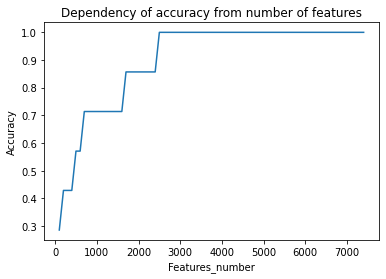

In [9]:
features_numbers = []
accuracy_values = []
for i in range(100, 7500, 100):
    local_features_to_use = features[:i]
    local_model = Classifier()
    local_model.fit(train_df, local_features_to_use, "class")
    local_predicted_classes = local_model.predict(test_df)
    local_acc = round(accuracy_score(real_classes, local_predicted_classes), 3)
    features_numbers.append(i)
    accuracy_values.append(local_acc)

plt.plot(features_numbers, accuracy_values)
plt.title("Dependency of accuracy from number of features")
plt.xlabel("Features_number")
plt.ylabel("Accuracy")

Dependency of accuracy from number of classes

Text(0, 0.5, 'Accuracy')

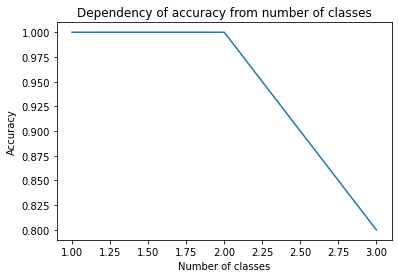

In [10]:
class_numbers = []
accuracy_values = []

for class_number in range(1, len(classes), 1):
    local_classes = classes[:class_number]
    local_dataset = dataset[dataset["class"].isin(local_classes)]
    local_train_df = local_dataset.sample(frac=0.85, random_state=18)
    local_test_df = local_dataset.drop(local_train_df.index)
    classes_local_model = Classifier()
    classes_local_model.fit(local_train_df, features, "class")
    local_predicted = classes_local_model.predict(local_test_df)
    real = local_test_df["class"].values
    acc_val = accuracy_score(real, local_predicted)
    class_numbers.append(class_number)
    accuracy_values.append(acc_val)
    
plt.plot(class_numbers, accuracy_values)
plt.title("Dependency of accuracy from number of classes")
plt.xlabel("Number of classes")
plt.ylabel("Accuracy")

Demonstrate some images

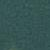

In [11]:
Image(filename=f"{data_dir}/water.jpg")

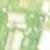

In [12]:
Image(filename=f"{data_dir}/town.jpg")

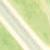

In [13]:
Image(filename=f"{data_dir}/road.jpg")

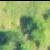

In [14]:
Image(filename=f"{data_dir}/field.jpg")

# Висновок

У даному завдання були взяті чотири різні види зображення(вода, місто, поле та ліс). Ці дані були перетворені на вектори
фіч та розподілені на вибірки для тренування та навчання. Для навчання використовувався метод еталонів. Модель вказаного программного класу була навчена методом ```fit```. Для класифікації був використаний метод ```predict``` із вказаного программного класу. Модель показала точність 100%. Далі були проведені тести стосовно побудови моделей, що навчаються за різною кількістю ознак.
Як видно із малюнку графіку точність у вказаному тесті коливається від 30 до 100 відсотків. Зі збільшенням кількості ознак збільшувалася і точність розпізнавання.
Також був проведений тест із різною кількістю класів розпізнавання і за малюнком графіку було визнано, що зі зменшенням кількості класів точність класифікації підвищується до 100%.
